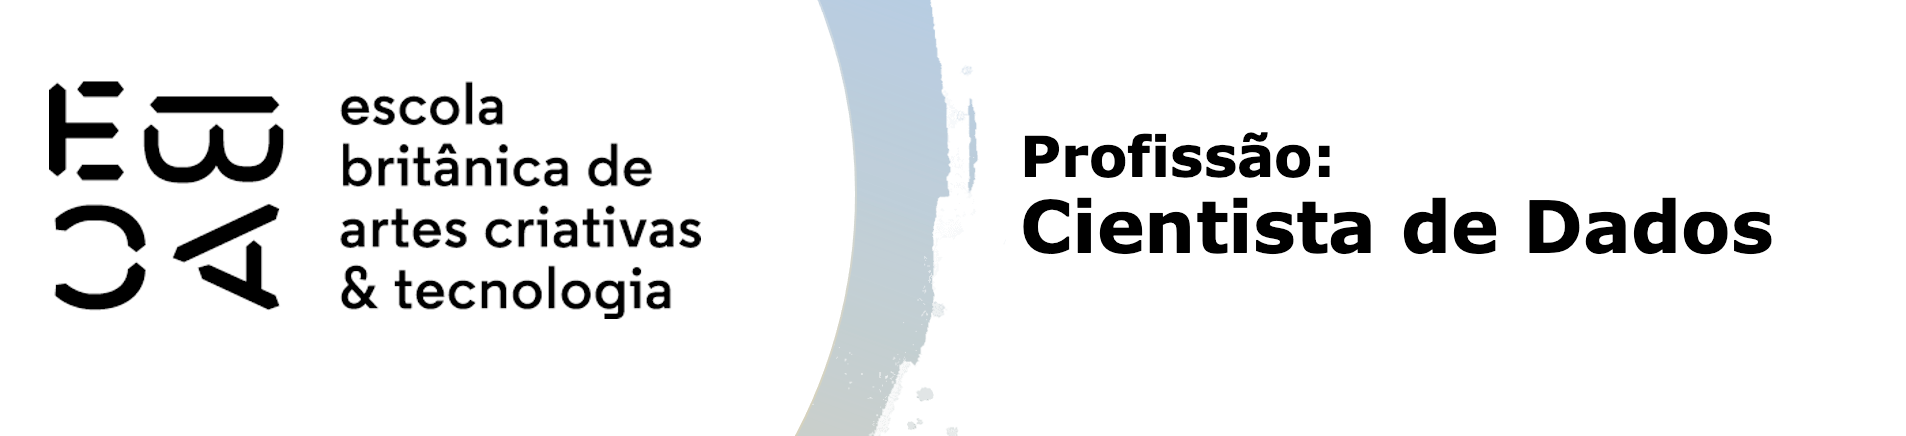

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

df_1 = pd.read_pickle('base_nfp.pkl')

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [2]:
# Dia da Semana (0 = segunda-feira, 6 = domingo)
df_1['Dia_Semana'] = df_1['Data Emissão'].dt.dayofweek

# Dummy para Fim de Semana (1 se for sábado ou domingo, 0 caso contrário)
df_1['Final_de_Semana'] = df_1['Data Emissão'].dt.dayofweek.isin([5,6]).astype(int)

# Dia do Mês
df_1['Dia_do_Mês'] = df_1['Data Emissão'].dt.day

# Mês
df_1['Mês'] = df_1['Data Emissão'].dt.month

# Trimestre
df_1['Trimestre'] = df_1['Data Emissão'].dt.quarter

In [3]:
# Criando as categorias para 'Valor NF'
df_1['Valor_NF_5'] = pd.qcut(df_1['Valor NF'], 5, labels=False)
df_1['Valor_NF_10'] = pd.qcut(df_1['Valor NF'], 10, labels=False)
df_1['Valor_NF_20'] = pd.qcut(df_1['Valor NF'], 20, labels=False)
df_1['Valor_NF_50'] = pd.qcut(df_1['Valor NF'], 50, labels=False)

In [4]:
df_1

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,categoria,Dia_Semana,Final_de_Semana,Dia_do_Mês,Mês,Trimestre,Valor_NF_5,Valor_NF_10,Valor_NF_20,Valor_NF_50
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,Mercado,4,0,30,6,2,1,3,7,17
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,Auto posto,4,0,30,6,2,2,5,11,28
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,1,3,7,19
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,3,7,15,38
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,Restaurantes,4,0,30,6,2,3,7,15,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,...,não definido,3,0,7,1,1,4,8,17,44
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,...,Mercado,3,0,7,1,1,4,9,18,46
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,...,Farmácia,3,0,7,1,1,3,7,15,39
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,...,Mercado,3,0,7,1,1,2,5,10,26


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [5]:
# Definindo o metadados
df = df_1.drop(columns=['Data Emissão', 'CNPJ emit.', 'Emitente', 
                'Valor NF', 'Data Registro', 'Créditos', 
                     'Situação do Crédito', 'Retorno'])
metadados = pd.DataFrame({'dtype':df.dtypes})

# Atribuindo papéis
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito', 'papel'] = 'resposta'
metadados['distintos'] = df.nunique()

# Definindo a função que retorna o IV
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='Total')
    
    evento = tab.columns[0]
    nao_evento = tab.columns[1]
    
    tab['pct_evento'] = tab[evento]/tab.loc['Total', evento]
    tab['pct_nao_evento'] = tab[nao_evento]/tab.loc['Total', nao_evento]
    tab['Woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['IV_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.Woe
    return tab['IV_parcial'].sum()

# Populando o metadados
for var in metadados[metadados.papel=='covariavel'].index:
    if (metadados.loc[var, 'distintos']>50):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5, duplicates='drop'), df.flag_credito)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.flag_credito)
metadados.sort_values('IV', ascending=False)            

,dtype,papel,distintos,IV
categoria,object,covariavel,9,0.408313
Valor_NF_50,int64,covariavel,50,0.152315
Valor_NF_20,int64,covariavel,20,0.124525
Valor_NF_10,int64,covariavel,10,0.106650
Valor_NF_5,int64,covariavel,5,0.056695
Dia_do_Mês,int64,covariavel,31,0.043719
Ano,int64,covariavel,5,0.041651
No.,int64,covariavel,124400,0.032394
Mês,int64,covariavel,12,0.027833
Trimestre,int64,covariavel,4,0.011507


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

<span style="color: darkolivegreen;"> Podemos concluir que as variáveis relacionadas à ```Valor NF``` e à ```categoria``` são as mais relevantes para prever se uma nota fiscal terá um crédito positivo. Além disso, a criação de categorias apropriadas para variáveis contínuas, como feito em ```Valor NF```, pode aumentar a capacidade de discriminação da variável em relação à variável alvo.</span>

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [6]:
# Analisando a quantidade de notas registradas por trimestre
notas_tri = df.groupby(['Ano','Trimestre'])['No.'].count().unstack()
notas_tri['Soma'] = notas_tri.sum(axis=1)
notas_tri

Trimestre,1,2,3,4,Soma
Ano,,,,,
2017,13418,11315,11162,7713,43608
2018,1160,1906,2482,4071,9619
2019,7208,9470,15242,15555,47475
2020,10572,9610,10716,11302,42200
2021,10083,10788,11622,12251,44744


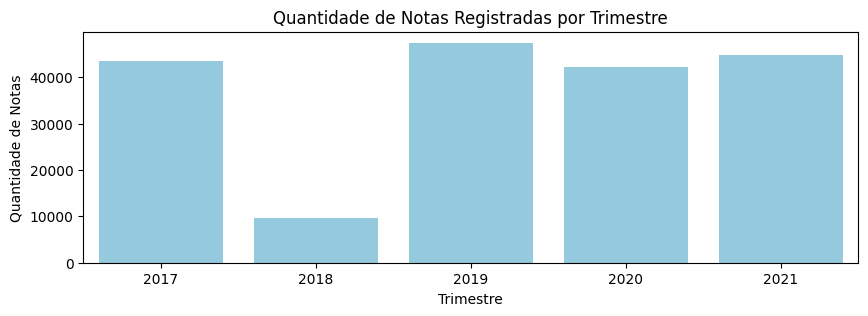

In [7]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 3))
sns.barplot(data=notas_tri, x=notas_tri.index, y='Soma', color='skyblue')
plt.title('Quantidade de Notas Registradas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas');

In [8]:
# Analisando a quantidade de notas por categoria e por trimestre
notas_cat_tri = df.groupby(['categoria', 'Trimestre'])['No.'].count().reset_index()
notas_cat_tri.head()

,categoria,Trimestre,No.
0,Alimentos,1,3686
1,Alimentos,2,4745
2,Alimentos,3,3655
3,Alimentos,4,2874
4,Auto posto,1,1040


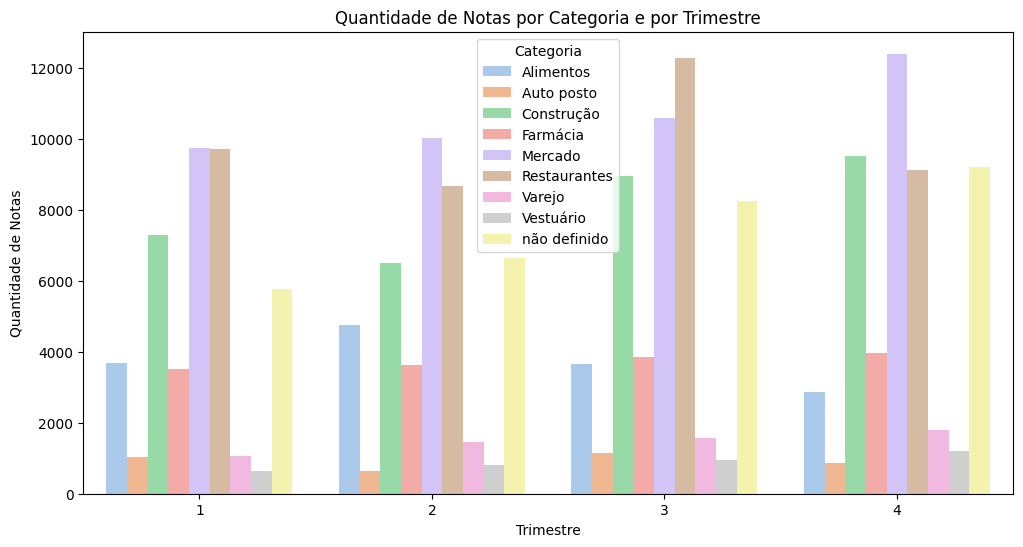

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=notas_cat_tri, x='Trimestre', y='No.', hue='categoria', palette='pastel')
plt.title('Quantidade de Notas por Categoria e por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.legend(title='Categoria');

In [10]:
# Analisando a proporção de notas com crédito por categoria e por trimestre
prop_notas_cred = df[df['flag_credito'] == 1].groupby(['categoria', 'Trimestre'])['No.'].count() / df.groupby(['categoria', 'Trimestre'])['No.'].count()
prop_notas_cred = prop_notas_cred.reset_index().fillna(0)
prop_notas_cred.head()

,categoria,Trimestre,No.
0,Alimentos,1,0.875746
1,Alimentos,2,0.882824
2,Alimentos,3,0.857729
3,Alimentos,4,0.805846
4,Auto posto,1,0.051923


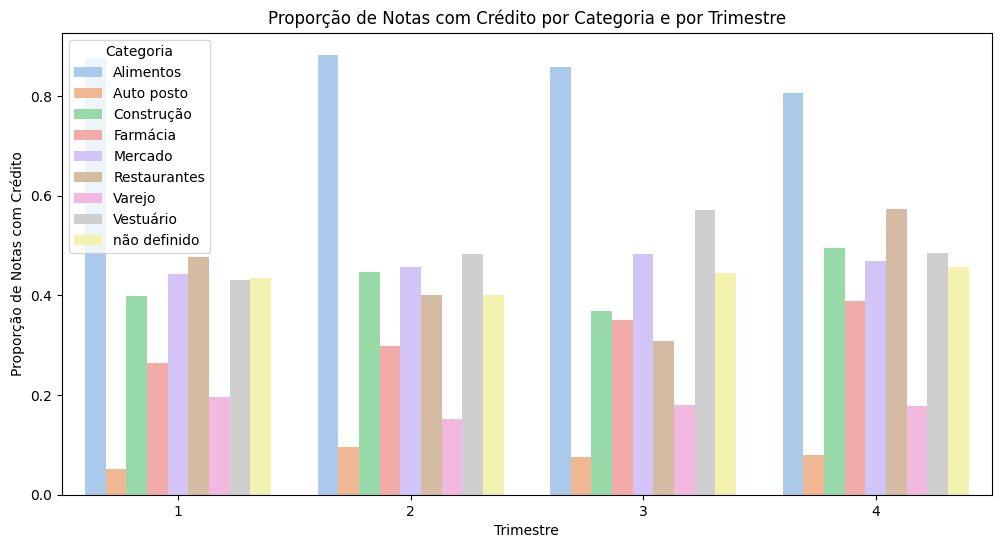

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_notas_cred, x='Trimestre', y='No.', hue='categoria', palette='pastel')
plt.title('Proporção de Notas com Crédito por Categoria e por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria');

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [12]:
# Calculando as frequências das categorias por trimestre
tab = df.groupby(['Trimestre', 'categoria'])['flag_credito'].value_counts().unstack(fill_value=0)
tab['N'] = tab.sum(axis=1)
tab['tx_evento'] = tab[1] / tab['N']
tab.reset_index(inplace=True)
tab.head()

flag_credito,Trimestre,categoria,0,1,N,tx_evento
0,1,Alimentos,458,3228,3686,0.875746
1,1,Auto posto,986,54,1040,0.051923
2,1,Construção,4387,2909,7296,0.398712
3,1,Farmácia,2595,928,3523,0.263412
4,1,Mercado,5414,4314,9728,0.443462


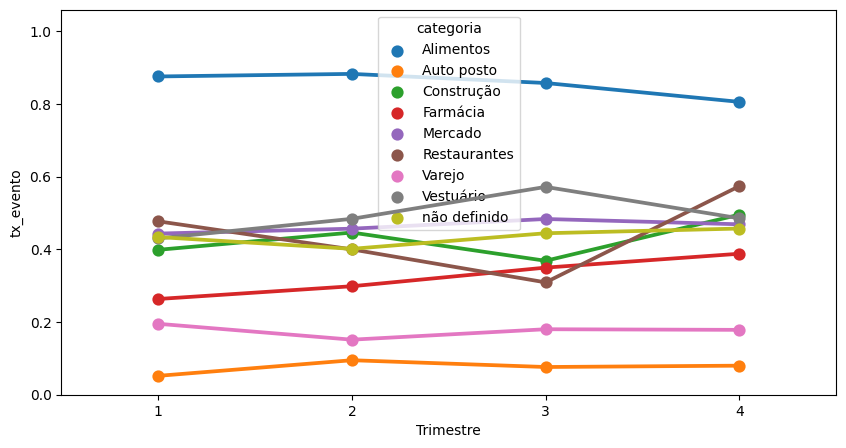

In [13]:
# Criando o gráfico do WOE ao longo do tempo
fig, ax = plt.subplots(figsize=(10, 5))

sns.pointplot(data=tab, x='Trimestre', y='tx_evento', hue='categoria', ax=ax)
ax.set_ylim([0, tab['tx_evento'].max() * 1.2]);

In [14]:
# Configurando rótulos do eixo X 
labs = tab['Trimestre'].unique()
ax.set_xticklabels(labs, rotation=30, fontsize='small')

# Legenda
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoria')

# Calculando do WOE
rotulo_evento, rotulo_nao_evento = (1, 0)
tab['pct_evento'] = tab[rotulo_evento] / tab.groupby('Trimestre')[rotulo_evento].transform('sum')
tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.groupby('Trimestre')[rotulo_nao_evento].transform('sum')
tab['WOE'] = np.log(tab['pct_evento'] / tab['pct_nao_evento'])
tab.head()

flag_credito,Trimestre,categoria,0,1,N,tx_evento,pct_evento,pct_nao_evento,WOE
0,1,Alimentos,458,3228,3686,0.875746,0.169520,0.019573,2.158795
1,1,Auto posto,986,54,1040,0.051923,0.002836,0.042139,-2.698626
2,1,Construção,4387,2909,7296,0.398712,0.152768,0.187487,-0.204790
3,1,Farmácia,2595,928,3523,0.263412,0.048734,0.110902,-0.822264
4,1,Mercado,5414,4314,9728,0.443462,0.226552,0.231377,-0.021076


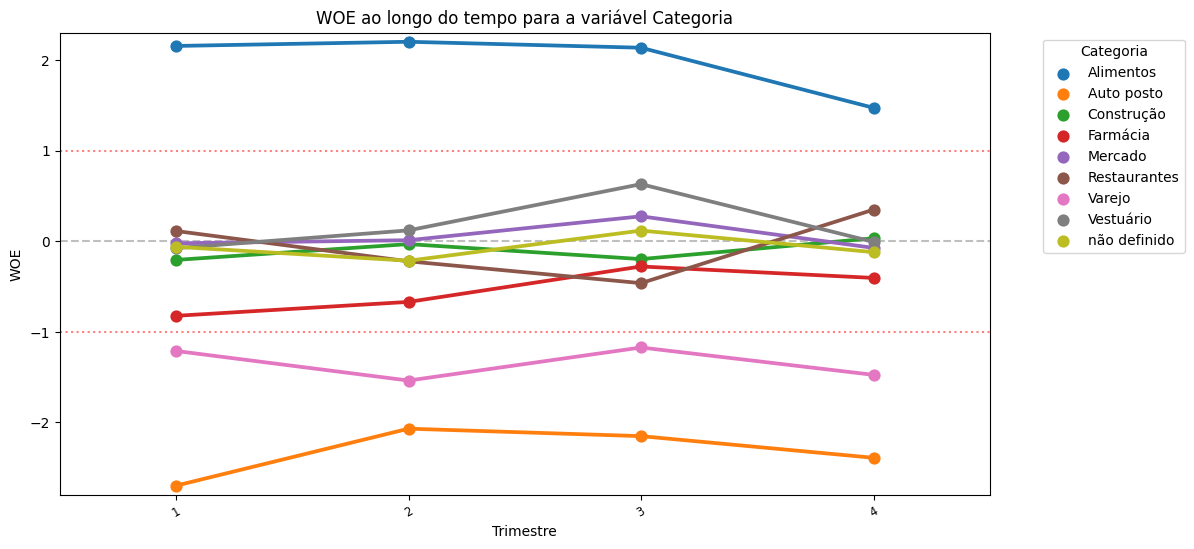

In [15]:
# Gráfico do WOE
fig, ax = plt.subplots(figsize=(12, 6))

sns.pointplot(data=tab, x='Trimestre', y='WOE', hue='categoria', ax=ax)
ax.set_ylim([min(tab['WOE']) - 0.1, max(tab['WOE']) + 0.1])

# Configurando rótulos do eixo X (se 'Trimestre' for um inteiro, você pode omitir este passo)
ax.set_xticklabels(labs, rotation=30, fontsize='small')

# Legenda
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categoria')

# Linhas de referência
ax.axhline(1, linestyle=':', color='red', alpha=0.5)
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
ax.axhline(-1, linestyle=':', color='red', alpha=0.5)

# Títulos
ax.set_title('WOE ao longo do tempo para a variável Categoria')
ax.set_xlabel('Trimestre');

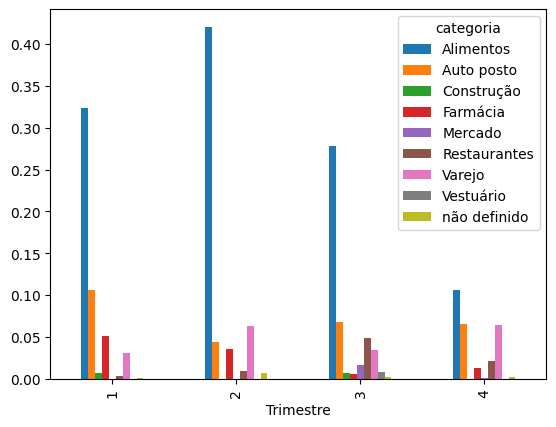

In [16]:
# Calculando o IV ao longo do tempo
tab['IV'] = (tab['pct_evento'] - tab['pct_nao_evento']) * tab['WOE']

# Pivotando o DataFrame para que 'categoria' seja uma coluna
iv_categoria = tab.pivot(index='Trimestre', columns='categoria', values='IV')
iv_categoria.plot.bar();

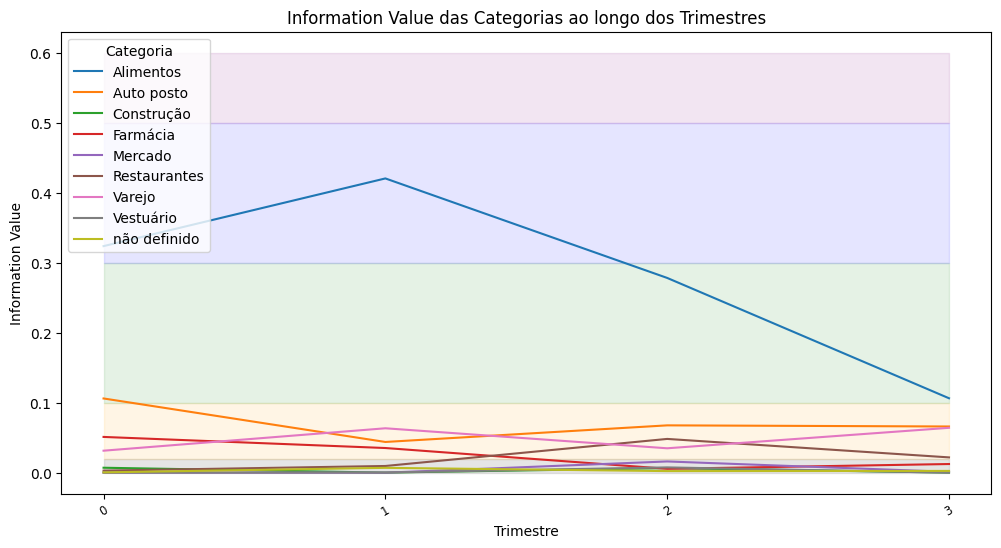

In [19]:
# Plotando o IV ao longo do tempo para a variável 'categoria'
def plot_iv(IV):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = range(len(IV))
    a = [0.02] * len(IV)
    b = [0.1] * len(IV)
    c = [0.3] * len(IV)
    d = [0.5] * len(IV)
    e = [0.6] * len(IV)
    
    ax.fill_between(x, a, color='grey', alpha=0.2)
    ax.fill_between(x, a, b, color='orange', alpha=0.1)
    ax.fill_between(x, b, c, color='green', alpha=0.1)
    ax.fill_between(x, c, d, color='blue', alpha=0.1)
    ax.fill_between(x, d, e, color='purple', alpha=0.1)
    
    # Plotar linhas de IV para cada categoria
    for col in IV.columns:
        ax.plot(x, IV[col], label=col)
    
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=30, fontsize='small')
    
    ax.set_title("Information Value das Categorias ao longo dos Trimestres")
    ax.set_ylabel("Information Value")
    ax.set_xlabel("Trimestre")
    
    ax.legend(loc='upper left', title='Categoria')

# Plotando o IV ao longo do tempo para a variável 'categoria'
plot_iv(iv_categoria)

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

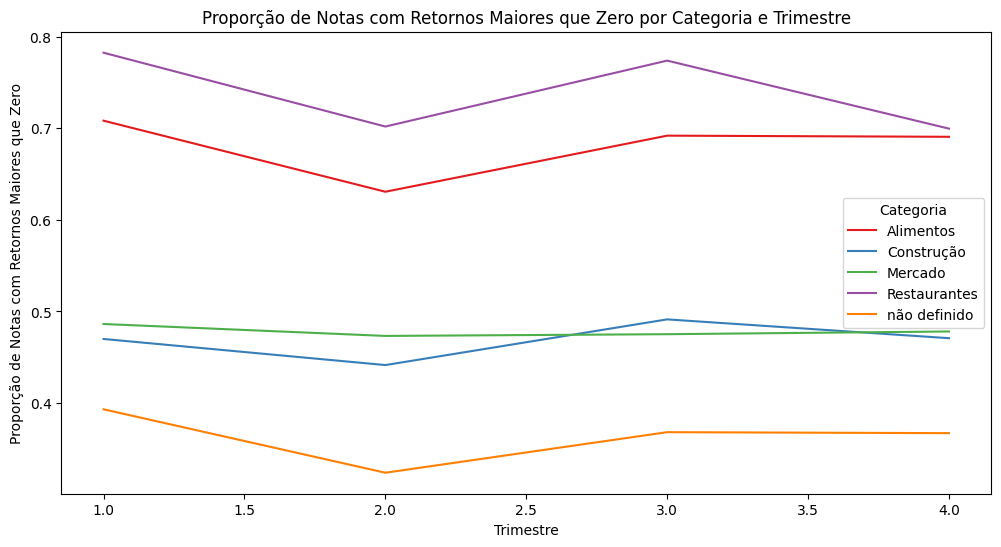

In [18]:
# Filtrando os dados a partir de janeiro de 2020
df_filtered = df_1[df_1['Data Emissão'] >= '2020-01-01']

# Calculando a proporção de notas com retornos maiores que zero por categoria e trimestre
prop_retorno_positivo = df_filtered[df_filtered['Retorno'] > 0].groupby(['categoria', 'Trimestre'])['No.'].count() / df_filtered.groupby(['categoria', 'Trimestre'])['No.'].count()
prop_retorno_positivo = prop_retorno_positivo.reset_index().fillna(0)

# Identificando as categorias com maior proporção média
categorias_com_maior_proporcao = prop_retorno_positivo.groupby('categoria')['No.'].mean().sort_values(ascending=False).head(5).index

# Filtrando os dados apenas para as categorias selecionadas
prop_retorno_positivo_selecionado = prop_retorno_positivo[prop_retorno_positivo['categoria'].isin(categorias_com_maior_proporcao)]

# Criando um gráfico de linhas para analisar a estabilidade ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=prop_retorno_positivo_selecionado, x='Trimestre', y='No.', hue='categoria', palette='Set1')
plt.title('Proporção de Notas com Retornos Maiores que Zero por Categoria e Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Retornos Maiores que Zero')
plt.legend(title='Categoria');

<span style= "color: darkolivegreen;"> As categorias de restaurantes, alimentos e mercado parecem ter uma proporção relativamente maior de notas com retornos maiores que zero a partir de janeiro de 2020, e essas diferenças são relativamente estáveis ao longo do tempo.</span>